#Regression Trees in Python

Regression Trees are Decision Trees created for Linear Regression purposes, instead of classification.

In this notebook, we will learn how they work, what is the basic concept behind those trees.

## Imports

In [1]:
# Basics
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Regression Trees from SkLearn
from sklearn.tree import DecisionTreeRegressor

# Linear Regression from sklear
from sklearn.linear_model import LinearRegression

## Dataset

In [2]:
# Let's create a basic X and Y dataset

df = pd.DataFrame( {'x': np.arange(1,21, dtype='int'),
                    'y': [0.01,0.1,0.2,0.23,0.15, 12.3,14,14.6,15,12.6, 53,55,53,58,60, 20,22,20.5,20.3, 21.1 ]} )

In [3]:
# Look how's the relationship between X and Y
fig = px.scatter(df,
                 x='x',
                 y= 'y')
fig.show()

## Simple Regression

If we were to create a linear regression between X and Y, it would be somehow complicated, because a straight line will not fit well to the data.
Observe the simple linear regression that follows.

In [4]:
# x and y
x = df[['x']]
y = df.y

# Model
lr_model = LinearRegression().fit(x,y)

# Intercept
print(lr_model.intercept_)
# Coefficient
print(lr_model.coef_)

1.7650000000000006
[1.98471429]


Our regression formula would be *y = a + bx*  **->** y = 1.765 + 1.984x

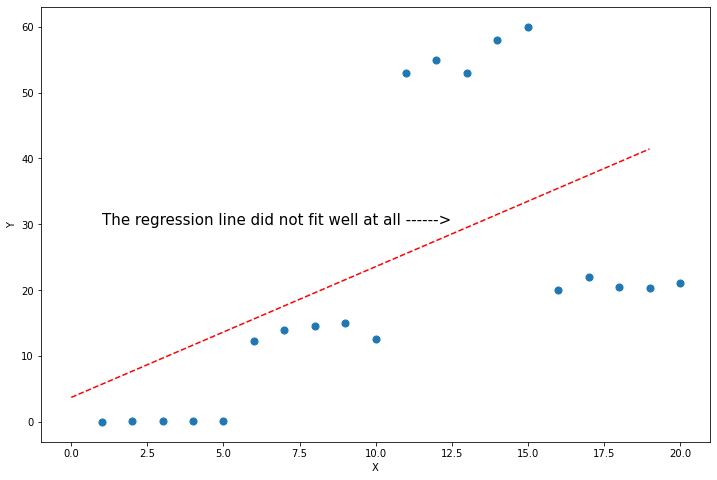

In [5]:
# Figure setup
plt.figure(figsize=(12,8))

# Let's plot the data...
plt.scatter(x=df.x,
            y= df.y,
            s=50)
plt.xlabel('X')
plt.ylabel('Y')

# ...and the linear regression line
plt.plot(1.765 + (1.984*df.x),
         color='red',
         linestyle='--')
plt.annotate('The regression line did not fit well at all ------>',
             xy= (1,30),
             size=15);

# Regression Tree

What if we could split our data into 4 little groups of 5 points each and create an average number for each of those. This is exactly what the Regression Tree will do.

This way, when **x** is between 1 and 5, **y** will be some number around 0. 

When **x** is between 10 and 15, **y** will be approx 55 and so far so on.

In [42]:
# Regression Tree instance
model_regt = DecisionTreeRegressor()

# Fit with same data
model_regt.fit(x,y)

# Prediction
pred = model_regt.predict(x)

#### Visualization of the predictions

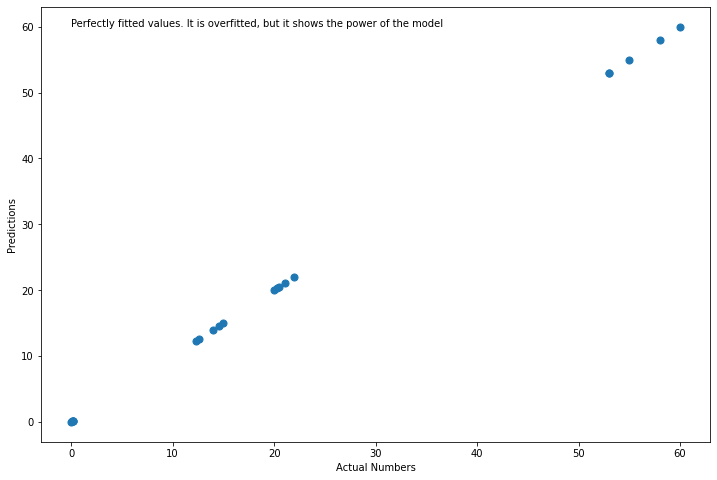

In [43]:
# Figure setup
plt.figure(figsize=(12,8))

# Let's plot the data...
plt.scatter(x=df.y,
            y= pred,
            s=50)
plt.xlabel('Actual Numbers')
plt.ylabel('Predictions')
plt.annotate('Perfectly fitted values. It is overfitted, but it shows the power of the model',
               xy=(0,60));

In [61]:
# Let's create some test data
test_data = pd.DataFrame({'x':[2.2,3.2,5.7,7,12.8,20,18]})

# Predictions
preds_test = model_regt.predict(test_data)

In [59]:
pd.DataFrame({'x': test_data.x,
              'pred': preds_test})

,x,pred
0,2.2,0.1
1,3.2,0.2
2,5.7,12.3
3,7.0,14.0
4,12.8,53.0
5,20.0,21.1
6,18.0,20.5


The results make sense, since they follow the rule:

* Between 0 and 5: y will be less than 0.5
* Between 6 and 10: y will be between 12 and 15
* Between 11 and 15: y will be between 53 and 60
* Between 16 and 20: y will be between 20 and 22.


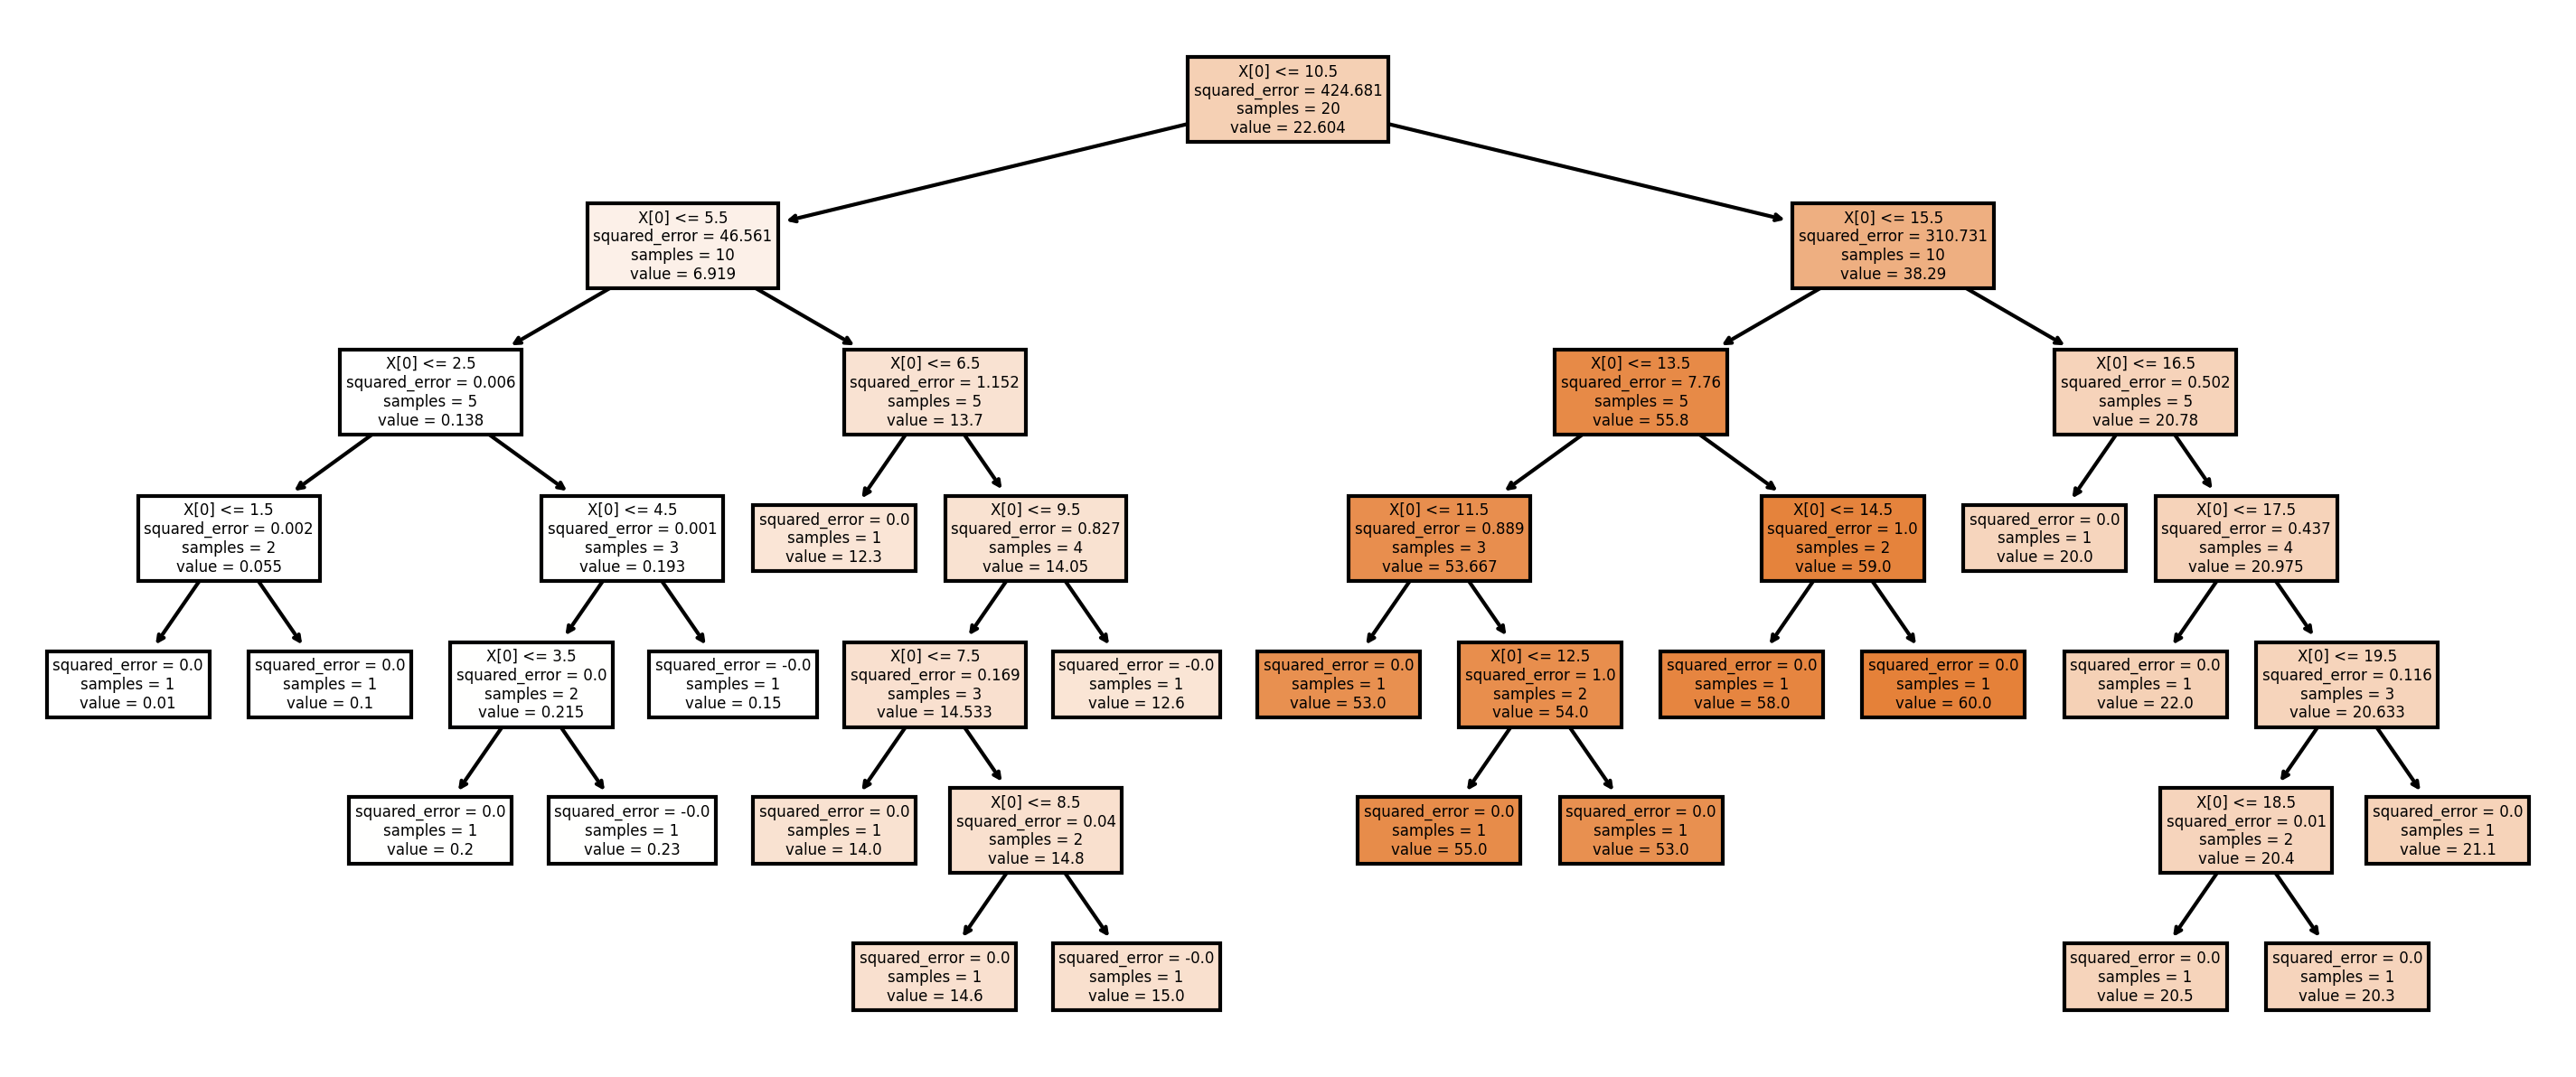

In [47]:
from sklearn import tree

# Steup size
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,5), dpi=300)

# Plot the tree
tree.plot_tree( model_regt,
               filled = True);